In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import os
import sys
import scipy
import anndata


plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams["font.family"] = "Arial"

sc.set_figure_params(figsize=(4, 4))

palette = ['#fbbc04', '#199de5', '#cfe6d5']

sc.settings.figdir = './figures_somatic/'

In [2]:
def Barplot(which_var, adata, var='clusters', height=3, color = False):
    plotdata = pd.crosstab(adata.obs[var], adata.obs[which_var], normalize='index') * 100
    if 'category' in plotdata.index.dtype.name:
        plotdata.index.reorder_categories(adata.obs[var].cat.categories[::-1])

    if not color:
        ax1 = plotdata.plot.barh(stacked = True, edgecolor = 'none', zorder = 3, figsize = (6,height), fontsize = 14, grid = False)
    else:
        ax1 = plotdata.plot.barh(stacked = True, edgecolor = 'none', zorder = 3, figsize = (6,height), fontsize = 14, grid = False, color = color)
    ax1.set_title(which_var+' %')
    ax1.set_ylabel(var)
    horiz_offset = 1
    vert_offset = 1.
    ax1 = ax1.legend(bbox_to_anchor = (horiz_offset, vert_offset))
#     ax1.figure.savefig(str(sc.settings.figdir)+'/barplot_'+var+'_proportions_'+which_var+'.pdf', bbox_inches='tight',
#                        dpi=300, orientation='landscape', format= 'pdf', optimize=True)

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams["font.family"] = "Arial"

sc.set_figure_params(figsize=(4, 4))

palette = ['#199de5', '#fbbc04', '#ff61fc']

# SOMATIC plots

### Read in dataset

In [3]:
path_to_gonads = '/nfs/team292/lg18/with_valentina/gonadsV2_revision/'

In [4]:
adata = sc.read(path_to_gonads + 'FCA-gonads_somatic_annotated.h5ad')

In [5]:
adata.obs['celltype'].values.describe()

,counts,freqs
categories,,
CoelEpi_GATA2,4205,0.021664
CoelEpi_LHX9,6436,0.033157
CoelEpi_LHX9_cycling,1613,0.008310
FetalLeydig,2873,0.014801
Gi,3567,0.018377
OSE,8126,0.041864
Oi,25087,0.129245
Sertoli,36795,0.189563
Ti,34474,0.177606


In [6]:
adata = adata[[i not in ['lowQC', 'Doublet', 'cont'] for i in adata.obs.lineage]]
adata = adata[[i not in ['lowQC', 'Doublet', 'cont'] for i in adata.obs.celltype]]
# adata = adata[[not i for i in adata.obs.is_doublet]]

/home/jovyan/my-conda-envs/sc_analysis/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [7]:
print('Total number of cells: {:d}'.format(adata.n_obs))
print('Total number of genes: {:d}'.format(adata.n_vars))

Total number of cells: 191230
Total number of genes: 25883


In [8]:
colorsSom_df = pd.read_csv('gonads_somatic_colors.csv',index_col=0)
colorsSom_df
idx = [colorsSom_df.index.tolist().index(i) for i in adata.obs['celltype'].cat.categories.tolist() ]
adata.uns['celltype_colors'] = [ colorsSom_df.color[i] for i in idx ]


label_annot = colorsSom_df['label'].to_dict()
adata.obs['labels'] = adata.obs['celltype'].map(label_annot)

colorsSom_df = colorsSom_df.set_index('label')
label2color_annot = colorsSom_df['color'].to_dict()
from natsort import natsorted
x = natsorted(list(set(adata.obs['labels'])))
adata.uns['labels_colors'] = [ label2color_annot[i] for i in  x ]

Trying to set attribute `.uns` of view, copying.


... storing 'labels' as categorical
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


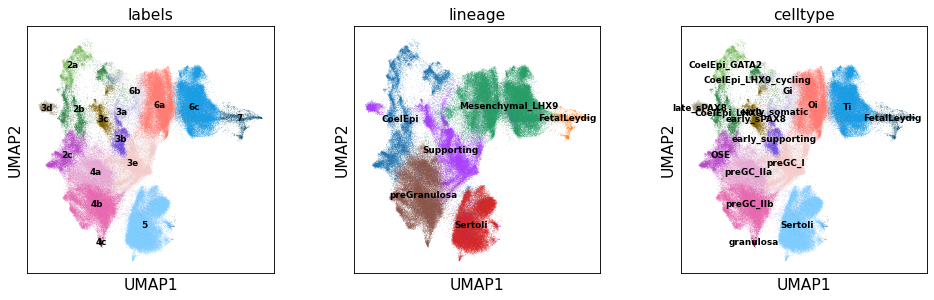

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


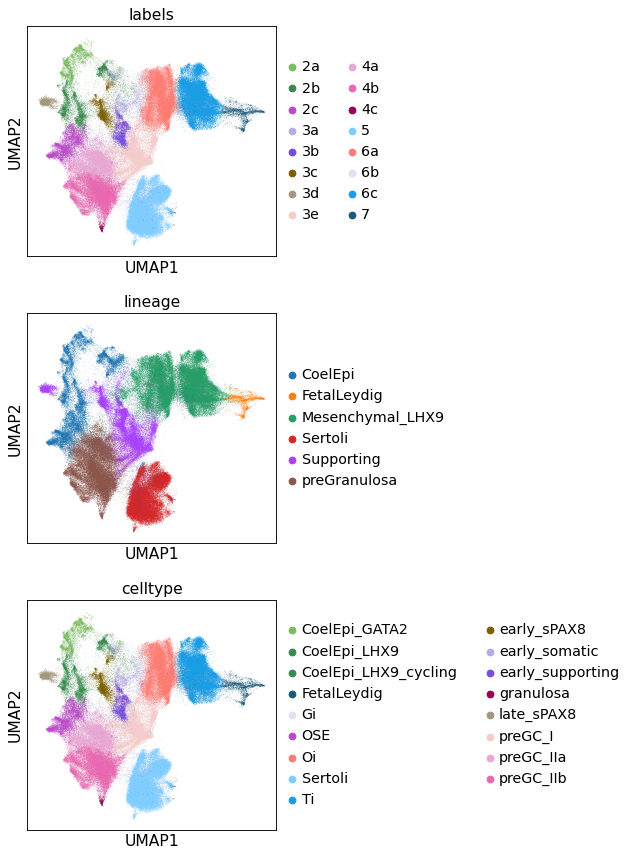

In [9]:
# plt.rcParams['figure.figsize'] = (4,4)
sc.pl.umap(adata, color=['labels', 'lineage', 'celltype'], legend_loc='on data', legend_fontsize=8, save='_human_somatic_labelsON.pdf')


with plt.rc_context({'figure.figsize': (3.5, 4)}):
    sc.pl.umap(adata, color=['labels', 'lineage', 'celltype'], ncols=1, save='_human_somatic_legend.pdf')

/home/jovyan/my-conda-envs/sc_analysis/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


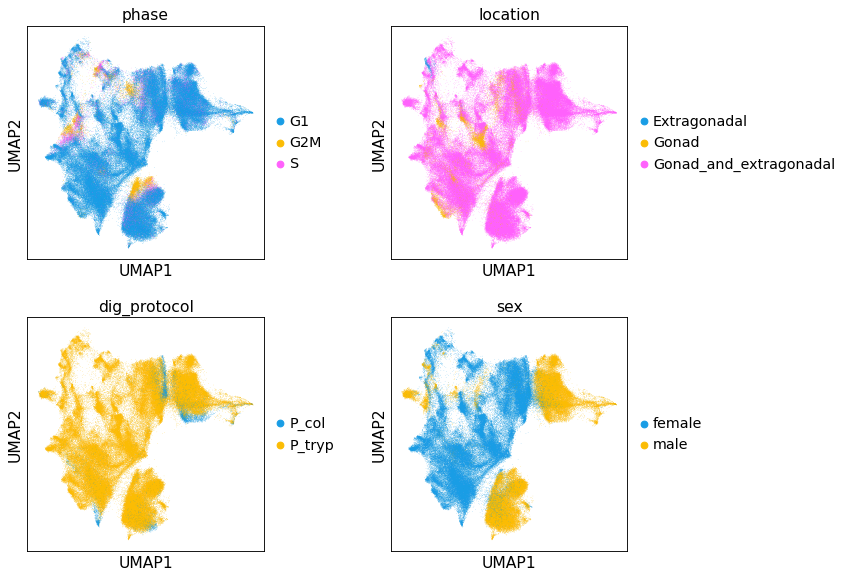

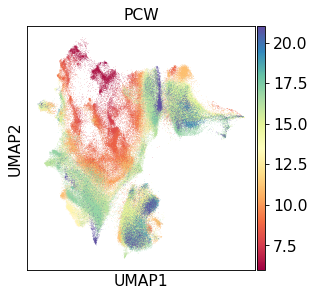

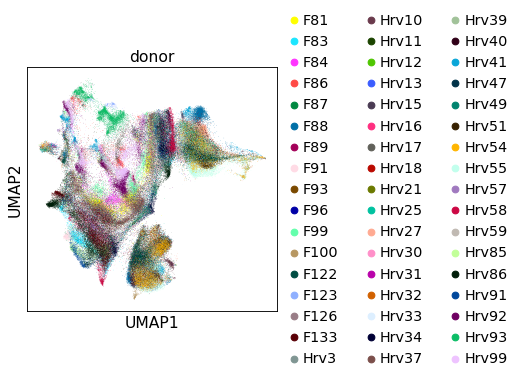

In [10]:
X_last = adata[[ i in 'gonadal_and_extragonadal' for i in adata.obs.location ]]
X_first = adata[[ 'gonadal_and_extragonadal' not in i for i in adata.obs.location ]]
X_resorted = X_first.concatenate(X_last)

with plt.rc_context({'figure.figsize': (3.5, 4)}):
    sc.pl.umap(
    X_resorted,
    color=['phase', 'location',  'dig_protocol', 'sex'], palette=palette,
    frameon=True, ncols = 2, wspace = 0.4, save='_somatic_metadata_I.pdf'
)
with plt.rc_context({'figure.figsize': (4, 4)}):
    sc.pl.umap(
        adata,
        color=["PCW"], cmap='Spectral',
        frameon=True, ncols = 2, wspace = 0.3, save='_somatic_metadata_II.pdf'
    )
with plt.rc_context({'figure.figsize': (4, 4)}):
    sc.pl.umap(
        adata,
        color=["donor"],
        frameon=True, ncols = 2, wspace = 0.3, save='_somatic_metadata_III.pdf'
    )

# Quick explore

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


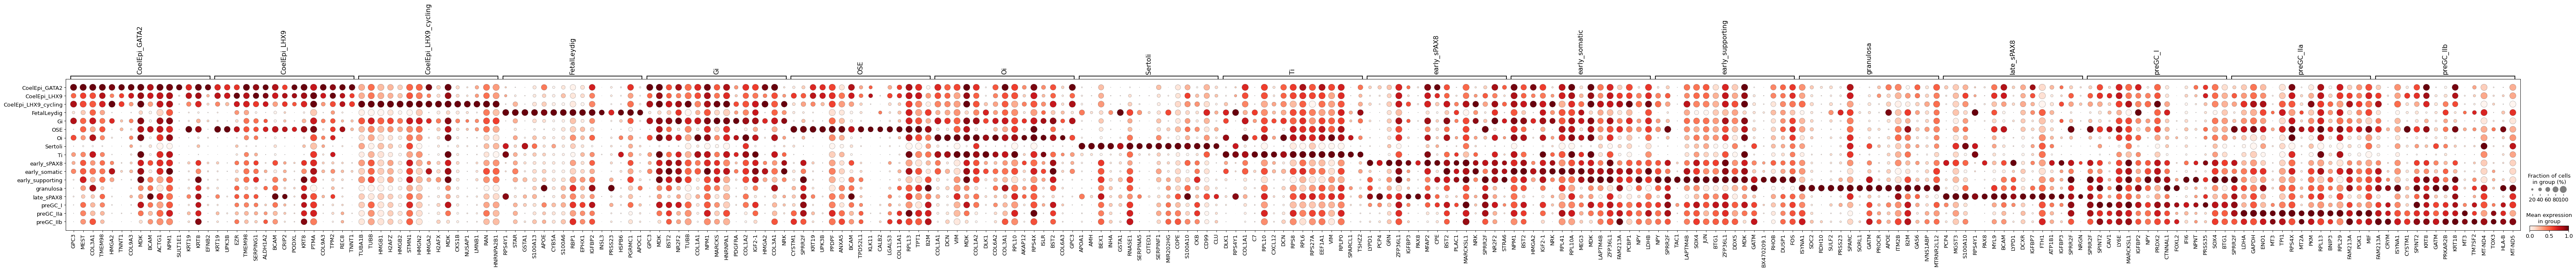

In [11]:
sc.tl.rank_genes_groups(adata, groupby='celltype', use_raw=False) #, method='logreg'
sc.pl.rank_genes_groups_dotplot(adata, n_genes=15, dendrogram=False, use_raw = False, standard_scale = 'var')

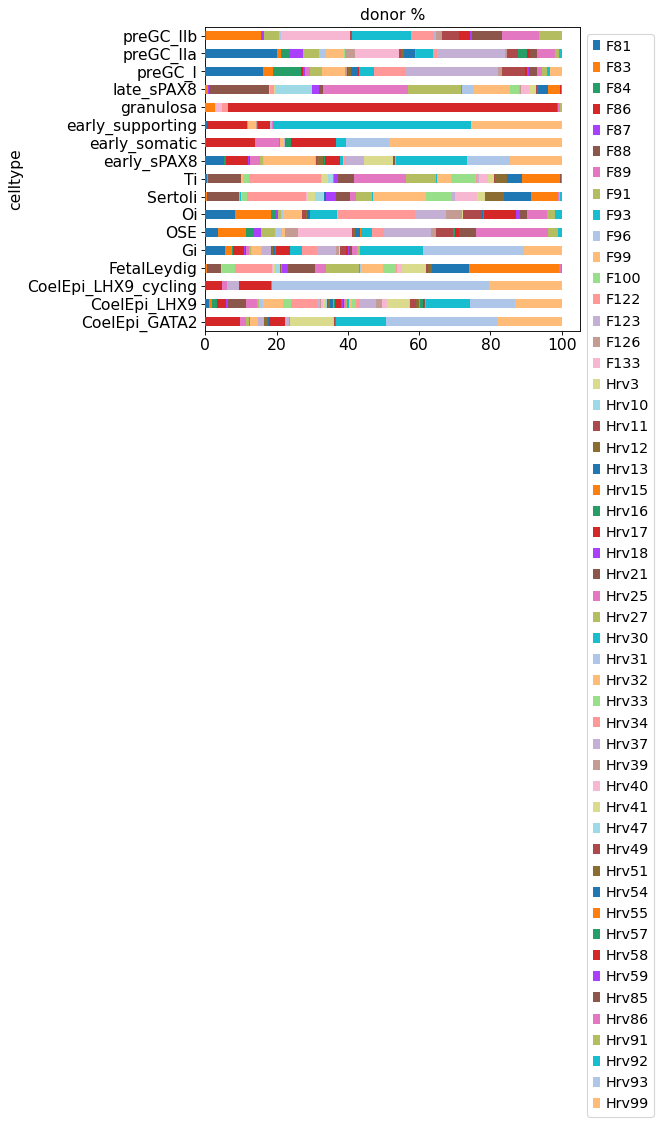

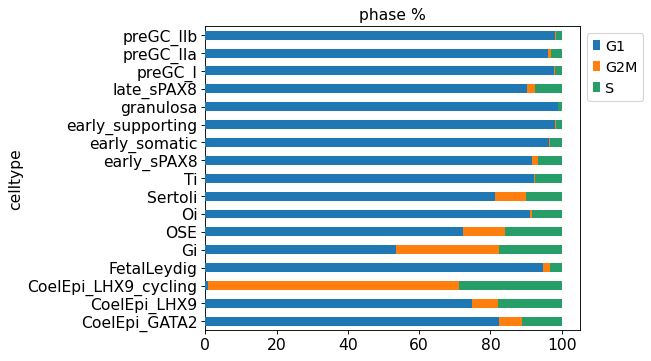

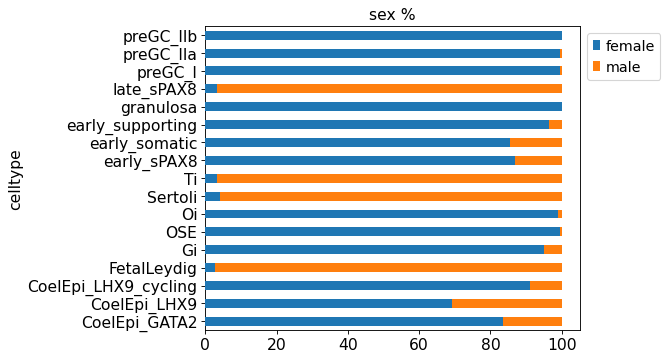

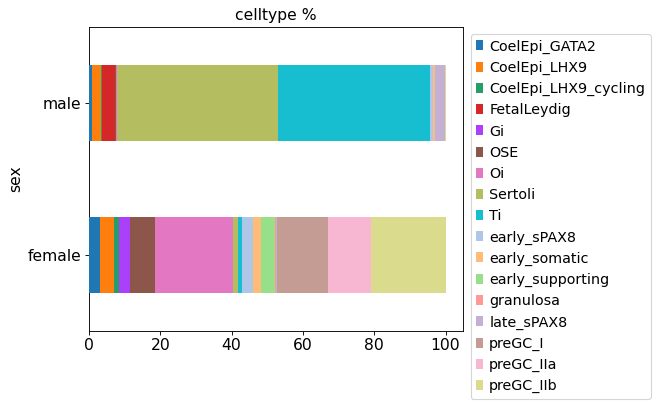

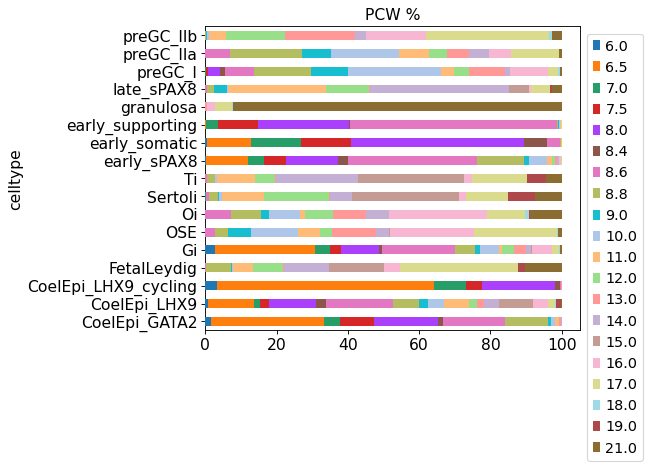

In [12]:
# adata = adata[[not i for i in adata.obs.is_doublet]]
# adata = adata[[i > 1000 for i in adata.obs.n_genes]]
Barplot('donor', adata, var='celltype', height=5)
Barplot('phase', adata, var='celltype', height=5)
Barplot('sex', adata, var='celltype', height=5)
Barplot('celltype', adata, var='sex', height=5)
Barplot('PCW', adata, var='celltype', height=5)

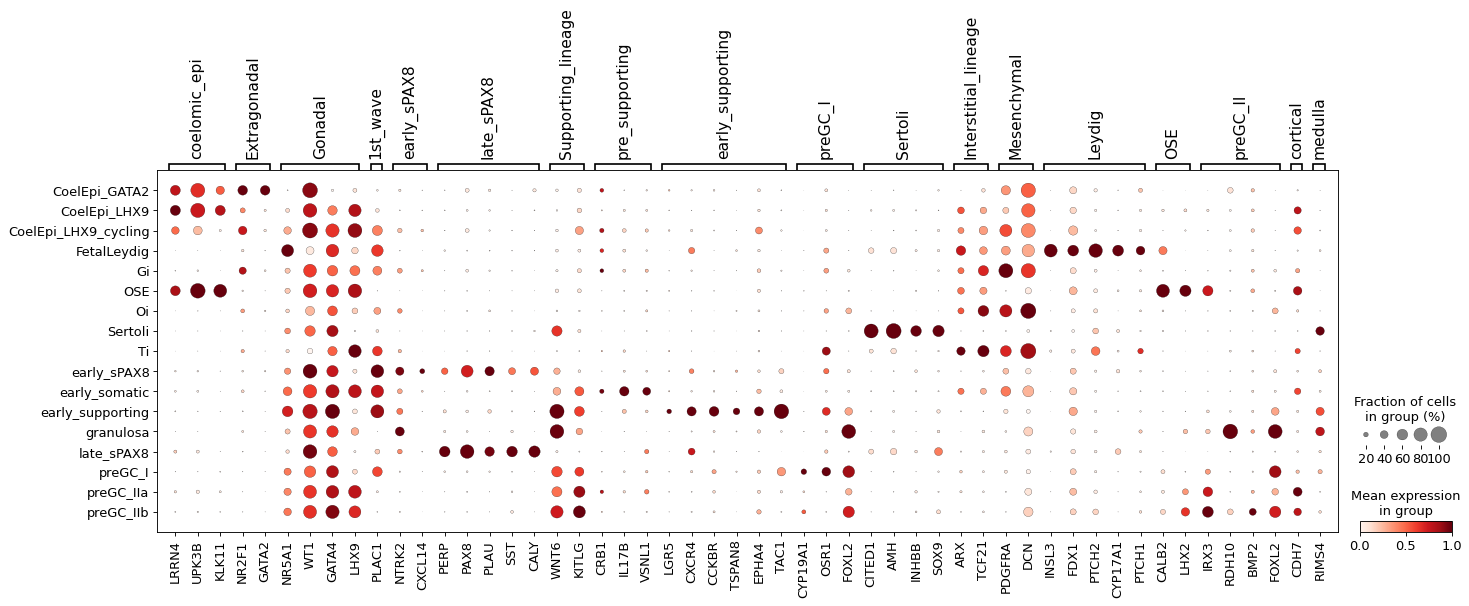

In [13]:
marker_genes = {
    'coelomic_epi': {'LRRN4', 'UPK3B', 'KLK11'},
    'Extragonadal':{'NR2F1', 'GATA2'},
    'Gonadal':{'WT1', 'LHX9', 'GATA4', 'NR5A1'},
    '1st_wave':{'PLAC1'},
    'early_sPAX8': {'NTRK2',  'CXCL14'},
    'late_sPAX8': {'PAX8', 'PLAU', 'PERP', 'CALY', 'SST'},
    'Supporting_lineage':{"WNT6",  'KITLG'},
    'pre_supporting': {'IL17B', 'VSNL1', 'CRB1'},
    'early_supporting':{'LGR5', 'TSPAN8', 'TAC1', 'EPHA4', 'CXCR4','CCKBR'},
    'preGC_I':{'OSR1', 'FOXL2', 'CYP19A1'},
    'Sertoli': {'AMH', 'CITED1',  'INHBB','SOX9'},
    'Interstitial_lineage':{'ARX', 'TCF21'},
    'Mesenchymal':{'DCN', 'PDGFRA'},
    'Leydig':{'FDX1', 'INSL3',  'PTCH1',  'PTCH2', 'CYP17A1'},
    'OSE':{'LHX2', 'CALB2'},
    'preGC_II':{"IRX3", 'BMP2', 'FOXL2',"RDH10"},
    'cortical':{'CDH7'},
    'medulla':{'RIMS4'}
}
sc.pl.dotplot(adata, marker_genes, groupby='celltype', standard_scale = 'var')


... storing 'early_Setoli' as categorical


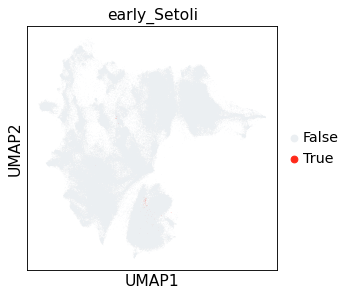

In [14]:
# Locate youngest Sertoli
x = [ i in ['Hrv17'] for i in adata.obs['donor']]
y = [ i in ['Sertoli'] for i in adata.obs['celltype_somaticEarly']]
mask = [all(tup) for tup in zip(x,y)]

adata.obs['early_Setoli'] = [ str(i) for i in mask ]
sc.pl.umap(adata, color=['early_Setoli'], palette=['#ebeff2', '#ff2919'])

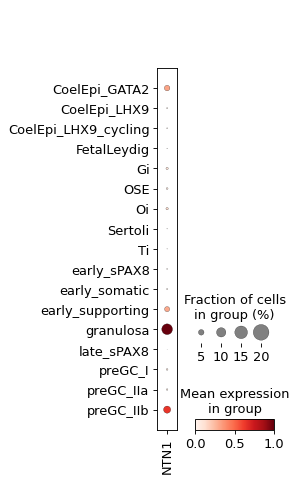

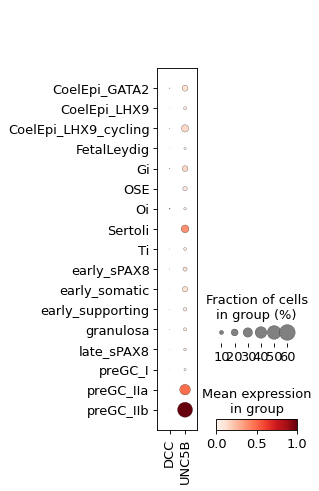

In [15]:
sc.pl.dotplot(adata, [ 'NTN1'], groupby='celltype', standard_scale = 'var')
sc.pl.dotplot(adata, ['DCC', 'UNC5B'], groupby='celltype', standard_scale = 'var')

## PLOT first wave

... storing 'celltype' as categorical


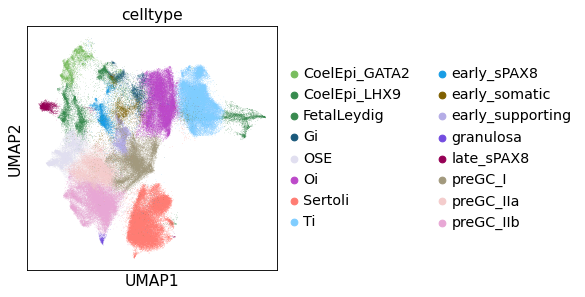

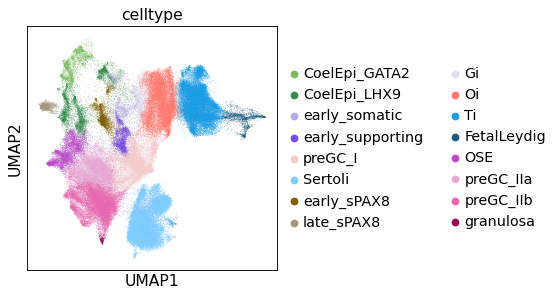

In [16]:
# Merge coel epitheliums Lhx9 for simplicity
adata.obs['celltype'] = adata.obs['celltype'].tolist()
adata.obs['celltype'] = [ i.replace('_cycling', '') for i in adata.obs['celltype'] ]
sc.pl.umap(adata, color=['celltype'])
adata.obs['celltype'].cat.reorder_categories(['CoelEpi_GATA2', 'CoelEpi_LHX9',  
                                              'early_somatic', 
                                              'early_supporting', 'preGC_I',  'Sertoli', 
                                             'early_sPAX8', 'late_sPAX8', 'Gi','Oi', 'Ti', 'FetalLeydig', 
                                              'OSE', 'preGC_IIa', 'preGC_IIb','granulosa'], inplace=True)
colorsSom_df = pd.read_csv('gonads_somatic_colors.csv',index_col=0)
colorsSom_df
idx = [colorsSom_df.index.tolist().index(i) for i in adata.obs['celltype'].cat.categories.tolist() ]
adata.uns['celltype_colors'] = [ colorsSom_df.color[i] for i in idx ]
sc.pl.umap(adata, color=['celltype'])

In [17]:
marker_genes_humanspecific  = {
    'early_somatic': {'IL17B', 'VSNL1'},
    'early_supporting':{'TSPAN8', 'LGR5','CXCR4', 'RIMS4'},
    'preGC_I':{'OSR1'}
}
marker_genes_shared1wave = {
    'coelomic_epi': {'LRRN4', 'UPK3B'},
    'Extragonadal':{'GATA2'},
    'Gonadal':{'LHX9', 'GATA4', 'NR5A1'},
    'Supporting_lineage':{"WNT6",  'KITLG'},
    'Interstitial_lineage':{'ARX', 'TCF21'},
    'male_fate':{'SRY'},
    'early_supporting':{'CPA2', 'GPR37', 'DMRT1'},
    'granulosa':{'FOXL2', "IRX3"},
    'Sertoli': {'AMH','SOX9'},
    'sPAX8': {'PAX8'},
    'Mesenchymal':{'DCN', 'PDGFRA'}
}
markers_mouse = {
    'early_supporting':{'CPA2', 'GPR37'}
}

In [18]:
adata.obs['celltype2'] = adata.obs['celltype'].tolist()

mask1 = np.array([i in 'early_supporting' for i in adata.obs['celltype']])
adata.obs.loc[mask1, 'celltype2'] = 'early_supporting_female'

mask2 = np.array([i in 'male' for i in adata.obs['sex']])
mask = [all(tup) for tup in zip(mask1, mask2)]
adata.obs.loc[mask, 'celltype2'] = 'early_supporting_male'

... storing 'celltype2' as categorical
... storing 'celltype_sex' as categorical


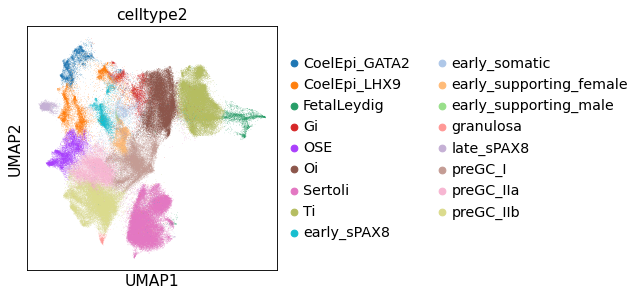

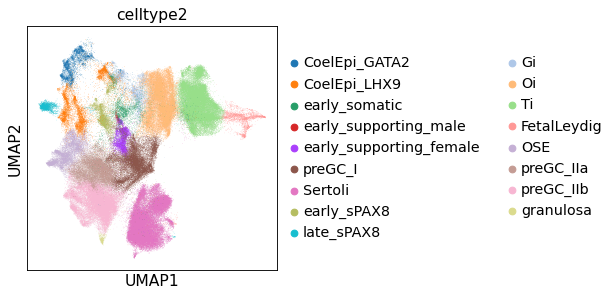

In [36]:
sc.pl.umap(adata, color=['celltype2'])
adata.obs['celltype2'].cat.reorder_categories(['CoelEpi_GATA2', 'CoelEpi_LHX9',  
                                              'early_somatic', 
                                              'early_supporting_male','early_supporting_female', 'preGC_I',  'Sertoli', 
                                             'early_sPAX8', 'late_sPAX8', 'Gi','Oi', 'Ti', 'FetalLeydig', 
                                              'OSE', 'preGC_IIa', 'preGC_IIb','granulosa'], inplace=True)
sc.pl.umap(adata, color=['celltype2'])

/home/jovyan/my-conda-envs/sc_analysis/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


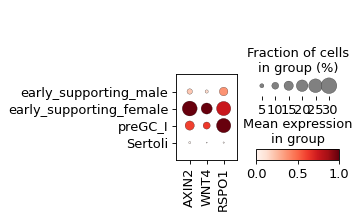

/home/jovyan/my-conda-envs/sc_analysis/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


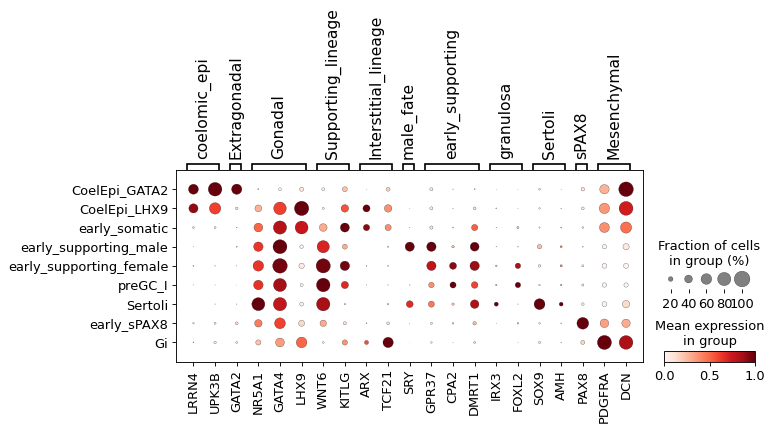

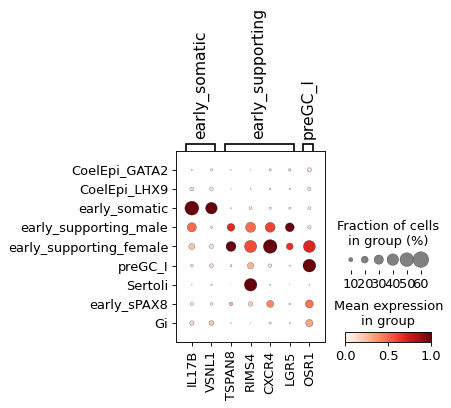

In [37]:
# 1st wave in < CS23
x = adata[[ i not in ['Oi', 'Ti', 'FetalLeydig', 'OSE', 'granulosa', 'preGC_IIa', 'preGC_IIb', 'late_sPAX8'] for i in adata.obs.celltype ]]
sc.pl.dotplot(x[[ i in ['Sertoli', 'early_supporting', 'preGC_I'] for i in x.obs.celltype ]], ['AXIN2', 'WNT4', 'RSPO1'], groupby='celltype2', standard_scale = 'var', save='_human_WNTpathway_markers.pdf')
sc.pl.dotplot(x[[ i < 8.6 for i in x.obs.PCW]], marker_genes_shared1wave, groupby='celltype2', standard_scale = 'var', save='_human_marker_dynamics.pdf')
sc.pl.dotplot(x, marker_genes_humanspecific, groupby='celltype2', standard_scale = 'var', save='_human_marker_dynamics_humanscpecific.pdf')

## PLOT second wave GRANULOSA

In [21]:
marker_genes = {
    'coelomic_epi': {'LRRN4', 'UPK3B', 'KLK11'},
    'Extragonadal':{'NR2F1', 'GATA2'},
    'Gonadal':{'WT1', 'LHX9', 'GATA4', 'NR5A1'},
    '1st_wave':{'PLAC1'},
    'early_sPAX8': {'NTRK2',  'CXCL14'},
    'late_sPAX8': {'PAX8', 'PLAU', 'PERP', 'CALY', 'SST'},
    'Supporting_lineage':{"WNT6",  'KITLG'},
    'pre_supporting': {'IL17B', 'VSNL1', 'CRB1'},
    'early_supporting':{'LGR5', 'TSPAN8', 'TAC1', 'EPHA4', 'CXCR4','CCKBR'},
    'preGC_I':{'OSR1', 'FOXL2', 'CYP19A1'},
    'Sertoli': {'AMH', 'CITED1',  'INHBB','SOX9'},
    'Interstitial_lineage':{'ARX', 'TCF21'},
    'Mesenchymal':{'DCN', 'PDGFRA'},
    'Leydig':{'FDX1', 'INSL3',  'PTCH1',  'PTCH2', 'CYP17A1'},
    'OSE':{'LHX2', 'CALB2'},
    'preGC_II':{"IRX3", 'BMP2', 'FOXL2',"RDH10"},
    'cortical':{'CDH7'},
    'medulla':{'RIMS4'}
}

marker_genes_granulosa  = {
    'Mesothelial': {'UPK3B', 'LRRN4'},
    'Gonadal':{'LHX9', 'GATA4'},
    'granulosa_fate':{'FOXL2'},
    'early_supporting':{'TSPAN8', 'LGR5'},
    'preGC_I':{'OSR1', 'PLAC1'},
    'preGC_I_':{'CYP19A1'},
    'OSE':{'CALB2'},
    '2nd_wave':{'LHX2', "IRX3"},
    'preGC_IIa':{"CYP26B1"},
    'preGC_IIb':{'BMP2'},
    'granulosa':{"NOTCH3","RDH10"}
}

/home/jovyan/my-conda-envs/sc_analysis/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


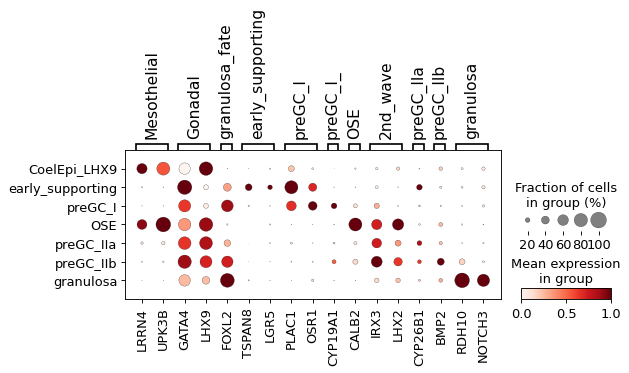

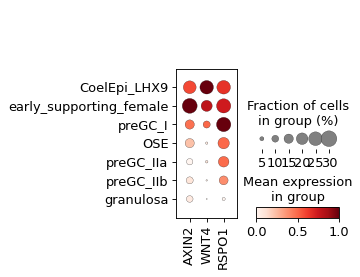

In [22]:
# granulosa
x = adata[[ i in ['CoelEpi_LHX9', 'early_supporting', 'preGC_I', 'OSE', 'granulosa', 'preGC_IIa', 'preGC_IIb'] for i in adata.obs.celltype ]]
x = x[[ 'female' in i for i in x.obs.sex ]]

x.obs['celltype'].cat.reorder_categories(['CoelEpi_LHX9',  'early_supporting',   'preGC_I', 
                                              'OSE', 'preGC_IIa', 'preGC_IIb','granulosa'], inplace=True)
sc.pl.dotplot(x, marker_genes_granulosa, groupby='celltype', standard_scale = 'var', save='_human_granulosa_markers.pdf')
sc.pl.dotplot(x, ['AXIN2', 'WNT4', 'RSPO1'], groupby='celltype2', standard_scale = 'var', save='_human_granulosa_WNTpathway_markers.pdf')

# PLOT metadata

In [23]:
import rpy2.rinterface_lib.callbacks
import logging
# Itoliste R warning messages
#Note: this can be commented out to get more verbose R output
rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR)
import anndata2ri
anndata2ri.activate()
%load_ext rpy2.ipython

In [24]:
df = adata.obs
mycolors =  adata.uns['celltype_colors']

In [25]:
%%R -i df -i mycolors

library(ggplot2)
df$time_range = '6'
df$time_range[ df$PCW >= 7 ] = '7-8'
df$time_range[ df$PCW >= 9 ] = '9-10'
df$time_range[ df$PCW >= 11 ] = '11-12'
df$time_range[ df$PCW >= 13 ] = '13-14'
df$time_range[ df$PCW >= 15 ] = '15-16'
df$time_range[ df$PCW >=17 ] = '17-21'
df$time_range = factor(df$time_range, levels = c('6', '7-8', '9-10', '11-12', '13-14','15-16', '17-21') )
df$sex = as.character(df$sex)
df$sex[ df$PCW < 7 ] = 'bipotent'
df$sex = factor(df$sex, levels = c('bipotent', 'male', 'female') )


idx = df$celltype == 'Ti' & df$sex == 'female'
df = subset(df, ! idx )
idx = df$celltype == 'Sertoli' & df$sex == 'female'
df = subset(df, ! idx )
idx = df$celltype == 'OSE' & df$sex == 'male'
df = subset(df, ! idx )
idx = df$celltype == 'Oi' & df$sex == 'male'
df = subset(df, ! idx )
idx = df$celltype == 'preGC_IIa' & df$sex == 'male'
df = subset(df, ! idx )

ggplot(df, aes(x=time_range, fill = celltype) ) + 
    scale_fill_manual(values = mycolors) +
    facet_wrap(~sex)+
    geom_bar(position = 'fill')+
    theme_classic(15) + theme(axis.text.x = element_text(angle = 45, hjust=1)) +
    ylab('% cells')+
    xlab('PCW')
ggsave(filename = paste0('figures_somatic/barplot_celltype_persex.pdf'), dpi = 300, width = 8, height = 4.5)

ggplot(df, aes(x=time_range, fill = celltype) ) + 
    scale_fill_manual(values = mycolors) +
    geom_bar(position = 'fill')+
    theme_classic(15) + theme(axis.text.x = element_text(angle = 45, hjust=1)) +
    ylab('% cells')+
    xlab('PCW')
ggsave(filename = paste0('figures_somatic/barplot_celltype.pdf'), dpi = 300, width = 5, height = 4.5)



# df$time_range = '6-7'
# df$time_range[ df$PCW >= 8 ] = '8-10'
# df$time_range[ df$PCW >= 11 ] = '11-13'
# df$time_range[ df$PCW >= 14 ] = '14-16'
# df$time_range[ df$PCW >=17 ] = '17-21'
# df$time_range = factor(df$time_range, levels = c('6-7', '8-10', '11-13', '14-16', '17-21') )

# ggplot(df, aes(x=time_range, fill = celltype) ) + 
#     scale_fill_manual(values = mycolors) +
#     facet_wrap(~sex)+
#     geom_bar(position = 'fill')+
#     theme_minimal(15) + theme(axis.text.x = element_text(angle = 45, hjust=1)) +
#     ylab('% cells')
# ggsave(filename = paste0('figures_somatic/barplot_celltype_per_sex.pdf'), dpi = 300, width = 5.5, height = 4.5)


# ggplot(df, aes(x=time_range, fill = celltype) ) + 
#     scale_fill_manual(values = mycolors) +
#     geom_bar(position = 'fill')+
#     theme_minimal(15) + theme(axis.text.x = element_text(angle = 45, hjust=1)) +
#     ylab('% cells')
# ggsave(filename = paste0('figures_somatic/barplot_celltype.pdf'), dpi = 300, width = 4.5, height = 4.5)

In [26]:
%%R -o shared_genes

path = '/nfs/team292/lg18/with_valentina/gonadsV2_revision/'
mouse = read.csv(paste0(path,'mouse-gonads_somatic_TFIDF.tsv'), stringsAsFactors=F, sep = '\t')
sLGR5_mouse = subset(mouse, cluster == 'early_supporting')$gene
human = read.csv(paste0(path,'FCA-gonads_somatic_TFIDF.tsv'), stringsAsFactors=F, sep = '\t')
sLGR5_human = subset(human, cluster == 'early_supporting')$gene

shared_genes = intersect(toupper(sLGR5_mouse), sLGR5_human)

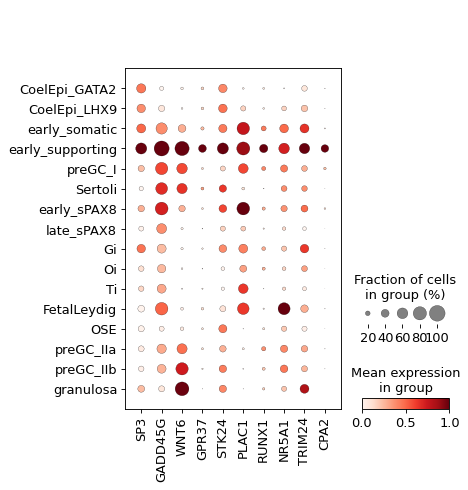

 [1] "SP3"     "GADD45G" "WNT6"    "GPR37"   "STK24"   "PLAC1"   "RUNX1"  
 [8] "NR5A1"   "TRIM24"  "CPA2"   



In [27]:
sc.pl.dotplot(adata, shared_genes, groupby='celltype', standard_scale = 'var')
print(shared_genes)

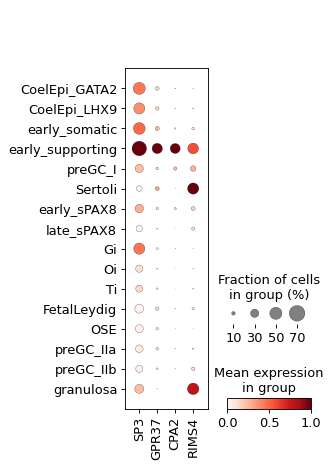

 [1] "SP3"     "GADD45G" "WNT6"    "GPR37"   "STK24"   "PLAC1"   "RUNX1"  
 [8] "NR5A1"   "TRIM24"  "CPA2"   



In [28]:
sc.pl.dotplot(adata, ["SP3", "GPR37","CPA2", 'RIMS4'], groupby='celltype', standard_scale = 'var')
print(shared_genes)

# Plots for reviewers
## SRY peak

/home/jovyan/my-conda-envs/sc_analysis/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


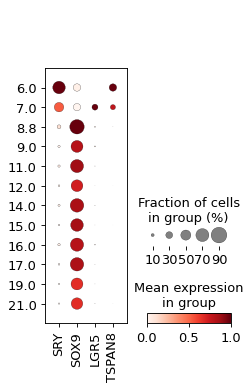

In [29]:
xx = adata[[ i in ['early_supporting', 'Sertoli'] for i in adata.obs.celltype  ]]
xx = xx[[ 'female' not in i for i in xx.obs.sex  ]]

sc.pl.dotplot(xx, ['SRY', 'SOX9', 'LGR5', 'TSPAN8'], groupby='stage', standard_scale = 'var', save='_human_SRY.pdf')

In [30]:
adata.obs['celltype2'] = adata.obs['celltype'].tolist()

mask1 = np.array([i in 'early_supporting' for i in adata.obs['celltype']])
adata.obs.loc[mask1, 'celltype2'] = 'early_supporting_female'

mask2 = np.array([i in 'male' for i in adata.obs['sex']])
mask = [all(tup) for tup in zip(mask1, mask2)]
adata.obs.loc[mask, 'celltype2'] = 'early_supporting_male'

### SRY peak in Guo

In [31]:
guo = sc.read('/nfs/team292/vl6/Guo_2021/early_annotated.h5ad')
guo.obs.head()

,n_genes,sample,PCW,farm_folder,percent_mito,n_counts,batch,doublet_score,doublet_score_0.75,scrublet_score,...,phase,scmap_early,prob_CoelEpi_GATA2,prob_CoelEpi_LHX9,prob_Gi,prob_Sertoli,prob_early_sPAX8,prob_early_somatic,prob_early_supporting,celltype
GSM4257562_AAACCTGAGCGCCTCA,839,GSM4257562,Week_6,GSM4257562_Male_Week_6,0.000576,1735.0,0,0.369369,0,0.194631,...,G1,unassigned,0.041861,0.407875,0.030560,0.013054,0.080259,0.395978,0.030414,Mesenchymal_LHX9
GSM4257562_AAACCTGCATACTCTT,1061,GSM4257562,Week_6,GSM4257562_Male_Week_6,0.023785,1934.0,0,0.164733,0,0.076372,...,G1,Gi,0.060720,0.057121,0.116984,0.006567,0.028642,0.719839,0.010127,Mesenchymal_LHX9
GSM4257562_AAACCTGTCGAGCCCA,3780,GSM4257562,Week_6,GSM4257562_Male_Week_6,0.018864,18077.0,0,0.125475,0,0.071101,...,G1,CoelEpi_GATA2,0.999742,0.000089,0.000005,0.000026,0.000101,0.000009,0.000027,CoelEpi_LHX9
GSM4257562_AAACGGGCACAGATTC,1020,GSM4257562,Week_6,GSM4257562_Male_Week_6,0.031369,2359.0,0,0.242902,0,0.057495,...,G1,CoelEpi_GATA2,0.493864,0.066691,0.141804,0.005376,0.076255,0.195361,0.020649,Mesenchymal_LHX9
GSM4257562_AAACGGGCATATACCG,4926,GSM4257562,Week_6,GSM4257562_Male_Week_6,0.028069,27219.0,0,0.102990,0,0.130000,...,G1,early_somatic,0.007807,0.126235,0.001464,0.003989,0.042334,0.799333,0.018836,early_somatic


/home/jovyan/my-conda-envs/sc_analysis/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


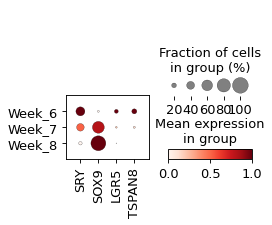

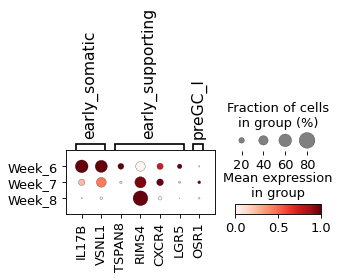

In [32]:
xx = guo[[ i in ['early_supporting', 'Sertoli'] for i in guo.obs.celltype  ]]
sc.pl.dotplot(xx, ['SRY', 'SOX9', 'LGR5', 'TSPAN8'], groupby='PCW', standard_scale = 'var', save='_human_SRY_Guo.pdf')
sc.pl.dotplot(xx, marker_genes_humanspecific, groupby='PCW', standard_scale = 'var', save='_human_earlyMarkers_Guo.pdf')

### SRY per celltype - sex

In [33]:
adata.obs['celltype_sex'] = [m+' '+n for m,n in zip(adata.obs['celltype'].tolist() ,adata.obs['sex'].tolist() )]

/home/jovyan/my-conda-envs/sc_analysis/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/home/jovyan/my-conda-envs/sc_analysis/lib/python3.7/site-packages/anndata/_core/anndata.py:1208: ImplicitModificationWarning: Initializing view as actual.
  "Initializing view as actual.", ImplicitModificationWarning
Trying to set attribute `.obs` of view, copying.
... storing 'celltype2' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'celltype_sex' as categorical


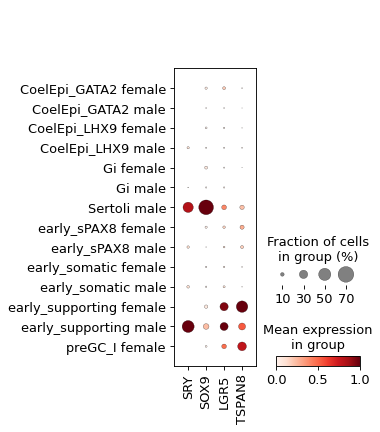

In [34]:
xx = adata[[ i not in ['Oi', 'Ti', 'FetalLeydig', 'OSE', 'granulosa', 'preGC_IIa', 'preGC_IIb', 'late_sPAX8'] for i in adata.obs.celltype ]]
xx = xx[[ i not in ['Sertoli female', 'preGC_I male'] for i in xx.obs.celltype_sex ]]
xx = xx[[ float(i) <= 8.5 for i in xx.obs.PCW  ]]
sc.pl.dotplot(xx, ['SRY', 'SOX9', 'LGR5', 'TSPAN8'], groupby='celltype_sex', standard_scale = 'var')

In [6]:
adata.obs['celltype'].values.describe()

,counts,freqs
categories,,
CoelEpi_GATA2,4205,0.021664
CoelEpi_LHX9,6436,0.033157
CoelEpi_LHX9_cycling,1613,0.008310
FetalLeydig,2873,0.014801
Gi,3567,0.018377
OSE,8126,0.041864
Oi,25087,0.129245
Sertoli,36795,0.189563
Ti,34474,0.177606


In [16]:
x = adata[[ i in 'female' for i in adata.obs.sex ]]
xs = x[[ i >= 9 for i in x.obs.PCW ]]
xs.obs['celltype'].values.describe()

/home/jovyan/my-conda-envs/sc_analysis/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


,counts,freqs
categories,,
CoelEpi_GATA2,159,0.001037
CoelEpi_LHX9,2575,0.016794
CoelEpi_LHX9_cycling,2,0.000013
FetalLeydig,2662,0.017362
Gi,864,0.005635
OSE,7614,0.049659
Oi,21150,0.137941
Sertoli,35515,0.231631
Ti,33575,0.218978


In [17]:
xsNoCycling = xs[[ i in ['G1']  for i in xs.obs.phase ]]
xsNoCycling.obs['celltype'].values.describe()

/home/jovyan/my-conda-envs/sc_analysis/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


,counts,freqs
categories,,
CoelEpi_GATA2,146,0.001063
CoelEpi_LHX9,2374,0.017284
CoelEpi_LHX9_cycling,1,0.000007
FetalLeydig,2518,0.018332
Gi,65,0.000473
OSE,5564,0.040509
Oi,19283,0.140390
Sertoli,28734,0.209198
Ti,30998,0.225681
